In [88]:
import torch
from torch import nn
from torch.optim import Adam
import random
import matplotlib.pyplot as plt

In [89]:
class Approx(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(nn.Linear(1, 1))

    def forward(self, x):
        return self.network(x)

In [90]:
a = random.uniform(-10, 10)
b = random.uniform(-10, 10)
dataset_x = torch.Tensor([i / 10 for i in range(-10, 10)]).reshape(-1, 1)
dataset_y = torch.Tensor([a * x + b + random.uniform(-1, 1) for x in dataset_x])

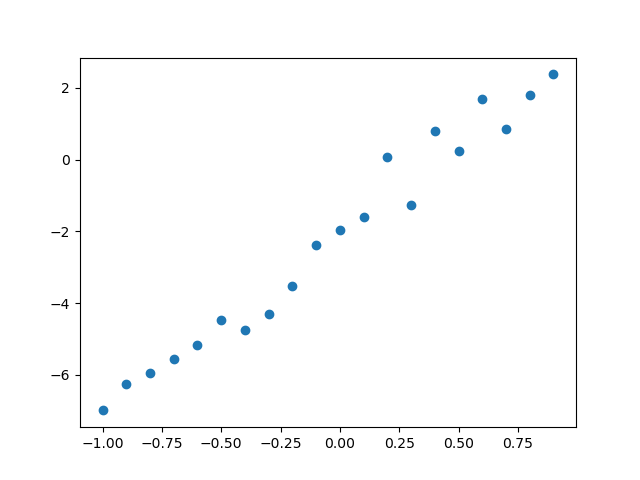

In [91]:
%matplotlib widget

plt.figure()
plt.scatter(dataset_x, dataset_y)

In [92]:
network = Approx()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(network.parameters())
epoch = 2000

network.train()

for e in range(epoch):
    output = network(dataset_x)
    loss = loss_fn(dataset_y, output[:, 0])
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if e % 50 != 0: continue
    print(f'epoch {e}:')
    print(f'    loss: {loss.item()}')
    

epoch 0:
    loss: 19.987276077270508
epoch 50:
    loss: 17.323108673095703
epoch 100:
    loss: 15.08430004119873
epoch 150:
    loss: 13.197240829467773
epoch 200:
    loss: 11.601472854614258
epoch 250:
    loss: 10.247320175170898
epoch 300:
    loss: 9.093931198120117
epoch 350:
    loss: 8.107694625854492
epoch 400:
    loss: 7.260921478271484
epoch 450:
    loss: 6.530796051025391
epoch 500:
    loss: 5.898488521575928
epoch 550:
    loss: 5.348439693450928
epoch 600:
    loss: 4.867785453796387
epoch 650:
    loss: 4.445860862731934
epoch 700:
    loss: 4.073821067810059
epoch 750:
    loss: 3.744309902191162
epoch 800:
    loss: 3.4512031078338623
epoch 850:
    loss: 3.189383029937744
epoch 900:
    loss: 2.9545722007751465
epoch 950:
    loss: 2.7431750297546387
epoch 1000:
    loss: 2.552170991897583
epoch 1050:
    loss: 2.3790078163146973
epoch 1100:
    loss: 2.221522808074951
epoch 1150:
    loss: 2.0778775215148926
epoch 1200:
    loss: 1.94650399684906
epoch 1250:
  

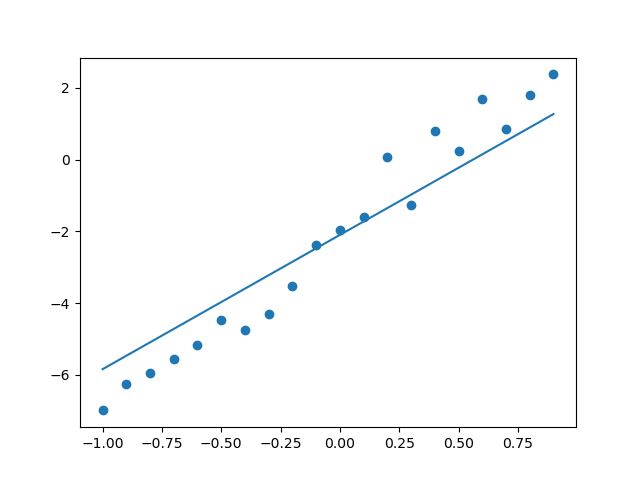

In [93]:
%matplotlib widget

plt.plot(dataset_x, [network(i).item() for i in dataset_x])
plt.show()